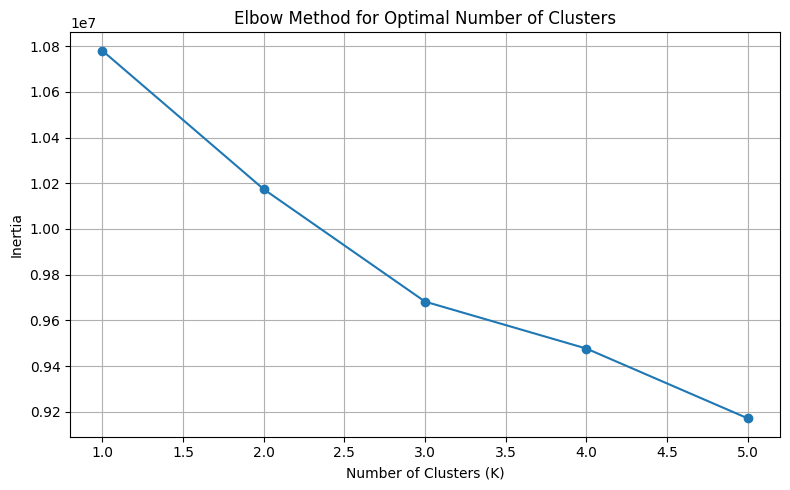

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load the dataset
df=pd.read_csv("../datasets/final_aggregated_data.csv")

# 2. Drop irrelevant columns (primary key and label)
features = df.drop(columns=["ACCIDENT_NO", "SEVERITY"])

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 4. Use the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 5. Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Perform KMeans clustering with the selected number of clusters (e.g., K=3)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)
df['Cluster'] = clusters

In [2]:
# 7. Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])
X_pca = X_pca.round(1)
crash_counts = (
    X_pca
    .groupby(['PCA_1', 'PCA_2'])
    .size()
    .reset_index(name='CRASH_COUNTS')
)
X_pca_with_counts = X_pca.merge(crash_counts, on=['PCA_1', 'PCA_2'], how='left')
X_pca_with_counts

,PCA_1,PCA_2,CRASH_COUNTS
0,5.3,-2.6,35
1,-1.2,-0.0,325
2,-0.4,-0.2,168
3,3.1,-1.1,110
4,3.8,-1.9,59
...,...,...,...
153989,-1.3,-0.1,435
153990,0.2,-0.9,76
153991,-1.3,0.3,209
153992,3.7,-1.7,108


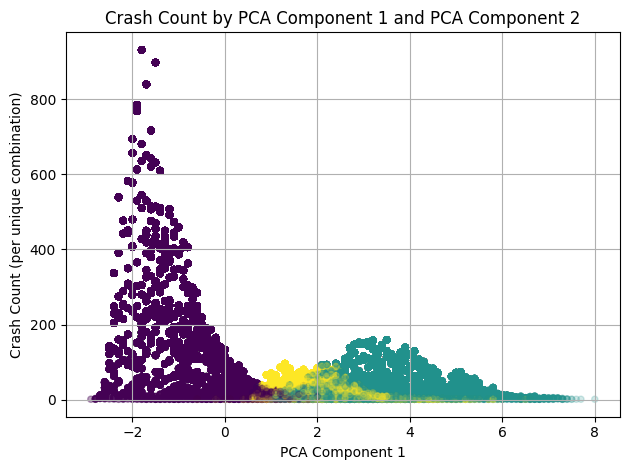

In [3]:
plt.scatter(
    x = X_pca_with_counts['PCA_1'],
    y = X_pca_with_counts['CRASH_COUNTS'],
    c=clusters,
    s = 20,
    alpha = 0.2,
)
plt.xlabel('PCA Component 1')
plt.ylabel('Crash Count (per unique combination)')
plt.title('Crash Count by PCA Component 1 and PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

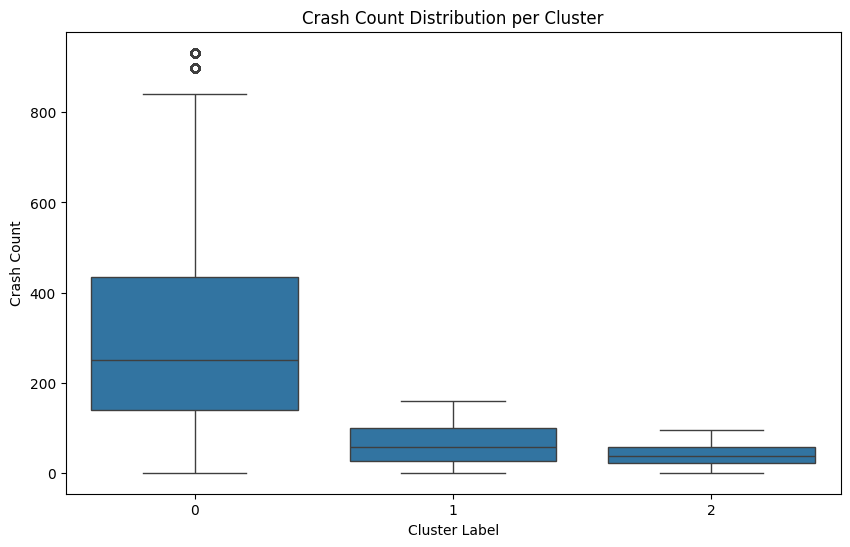

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=clusters, y=X_pca_with_counts['CRASH_COUNTS'])
plt.xlabel('Cluster Label')
plt.ylabel('Crash Count')
plt.title('Crash Count Distribution per Cluster')
plt.show()

Cluster Size Summary:
Cluster
0    111559
1     30668
2     11767
Name: count, dtype: int64

Cluster Feature Averages:
         TIME_OF_DAY_CODE  AGE_GROUP  SPEED_ZONE_High Speed Zone  \
Cluster                                                            
0                1.954266   2.270099                    0.098074   
1                2.331127   2.144874                    0.384538   
2                2.058214   2.401377                    0.014362   

         SPEED_ZONE_Medium Speed Zone  SPEED_ZONE_Low Speed Zone  \
Cluster                                                            
0                            0.629595                   0.214837   
1                            0.411602                   0.165123   
2                            0.434180                   0.474887   

         ROAD_USER_TYPE_DESC_Pedestrians  ROAD_USER_TYPE_DESC_Drivers  \
Cluster                                                                 
0                               0.004195             

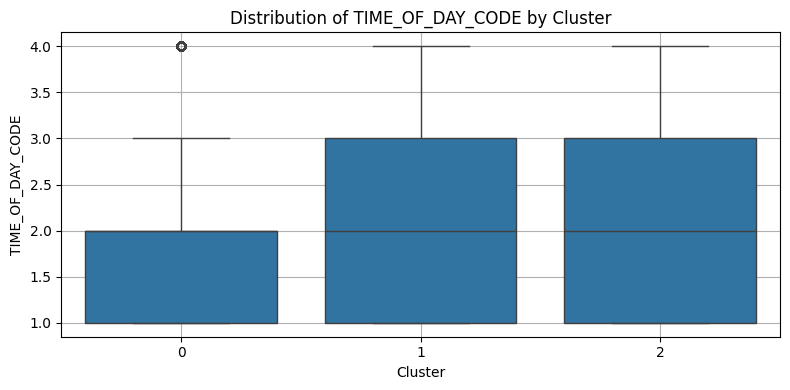

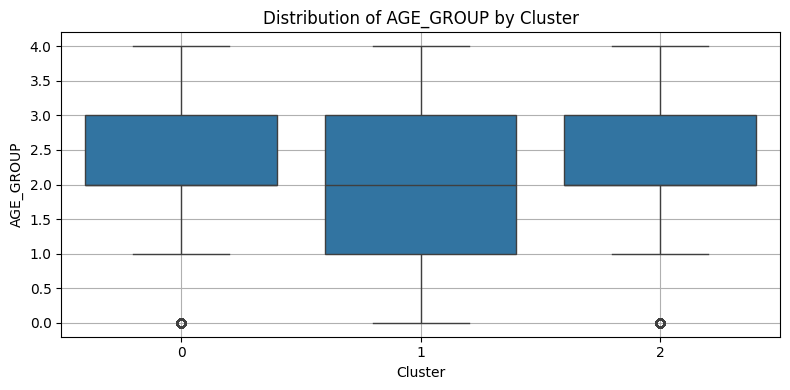

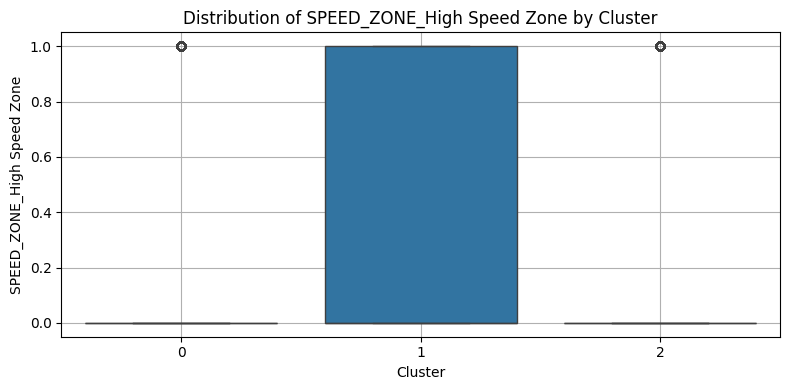

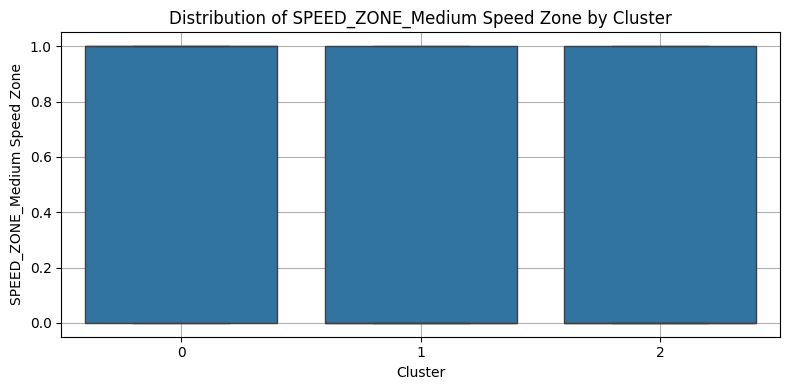

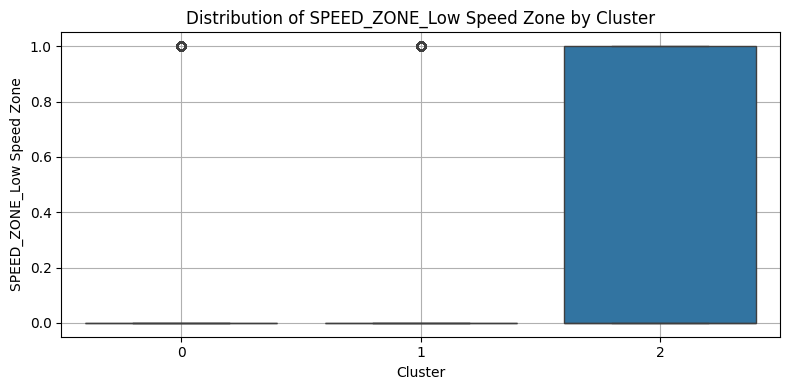

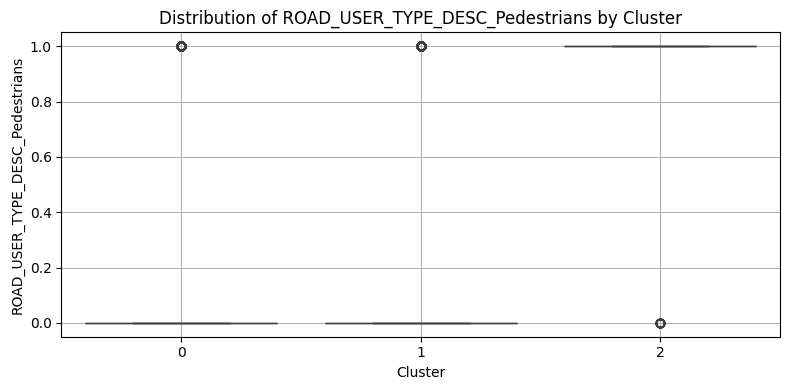

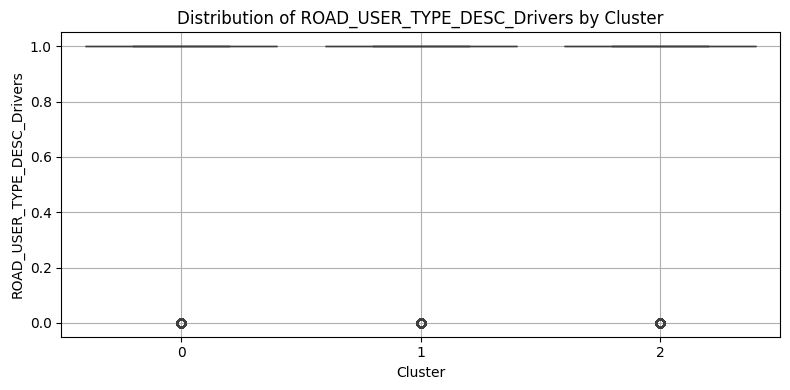

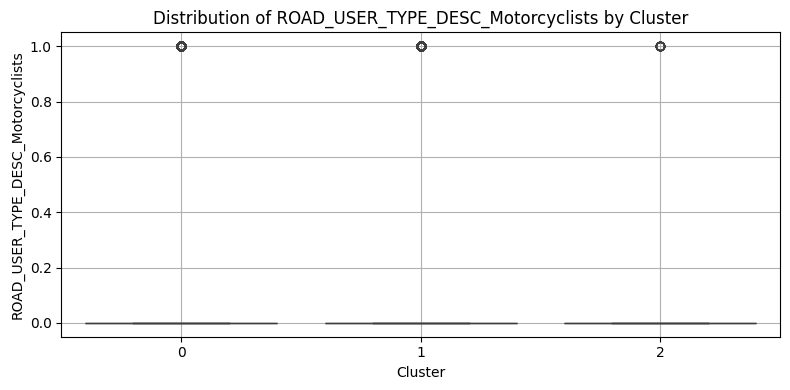

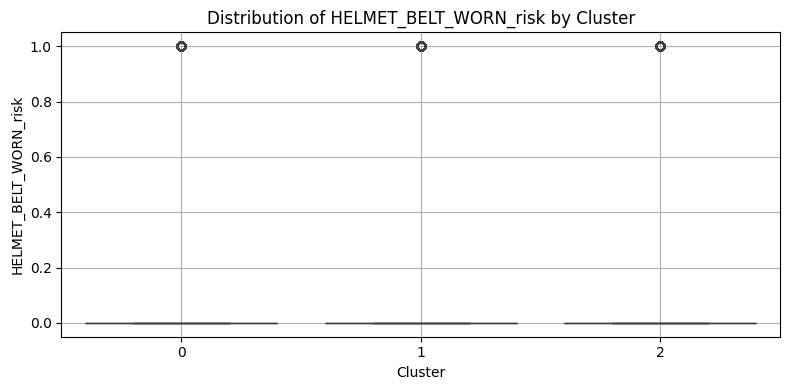

In [5]:
# 10. Summary of cluster sizes
cluster_counts = df["Cluster"].value_counts().sort_index()
print("Cluster Size Summary:")
print(cluster_counts)

# 11. Compute mean values of selected key features per cluster
# You can modify this list according to your analysis focus
key_features = [
    "TIME_OF_DAY_CODE",
    "AGE_GROUP",
    "SPEED_ZONE_High Speed Zone",
    "SPEED_ZONE_Medium Speed Zone",
    "SPEED_ZONE_Low Speed Zone",
    "ROAD_USER_TYPE_DESC_Pedestrians",
    "ROAD_USER_TYPE_DESC_Drivers",
    "ROAD_USER_TYPE_DESC_Motorcyclists",
    "HELMET_BELT_WORN_risk"
]

cluster_means = df.groupby("Cluster")[key_features].mean()
print("\nCluster Feature Averages:")
print(cluster_means)

# 12. Visualize selected features across clusters
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Cluster", y=feature, data=df)
    plt.title(f"Distribution of {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
